In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Regression
Regression is used to describe the relationship between a number of independant and dependant variables, and present the releationship in the form of an equation.
The regression equation produced can be used to make future predictions. 

Regression analysis estimates the effect of one independant variables whilst holding the other independant variables constant, in order to isolate each variable.

## -- Linear Regression (ordinary least squares (OLS)/ Linear least squares)

A regression with one independant variable is a linear regression model, with an equation of the form:

y= mx +b + error.

where b is the intercept and m the gradient of the slope.

## -- Multiple Linear Regression

When more than 2 independant variables are involved, it is a multiple linear regression model, with an equation of the form:

y= b0 + m1x1 + m2x2 + ... mnxn + error

## -- Polynomial Regression
A form of linear regression where the relationship between variables is modelled with an nth degree polynomial. Represents a nonlinear relationship. 
eg:
y= b0 + m1x + m2x^2 +.. mnx ^n



## -- Ridge Regression
Used for multiple regression data which is suject to multicollinearity ( when 2 or more vairables are highly linearly related). Such a correlation is undesirable in linear regression models as independant variables should be independant (and will be isolated from one another in regression analysis). This makes it difficult to determine the relationship between a variable with the dependant, as a change to one related independant variable will cause the other independant variable to change. 

It uses l2 regularisation, which adds a penalty to coefficents, equal to the square of the coefficients. All coefficient are shrunk by the same amount, but none are eliminated unlike lasso regression.



## -- Lasso Regression
Used for models with high multicollinearity or when you want to automate vairable selection during model creation. Lasso regression shrinks data points towards a central point- eg the mean, and produces a simpler model.

It uses L1 regularisation, which adds a penalty to coefficients. Some coeffients can therefore become very small or be eliminated from the model, making the model easier to interpt than ridge regression. 



## -- Partial Least Squares Regression
Used when you have a small set of dependant variables or when independant variables are highly correlated. It performs similar to principle component analysis, in that it reduces the independant variables down to a set of uncorrelated variables.


 

## Omitted Variable Bias

It is important to include all relevant variables in the model (a confounding variable- variables which impact the outcome of a model), as ommitting them can result in bias, and either suggest a false correlation, under or overestimate a correlation, or hide correlations.

If the model is incorrectly built, either because confounding variables are unknown or data is not avaliable, it can result in omitted variable bias and larger residuals and we cannot trust the results of the model.

For omitted variable bias to occur, the omitted variable must correlate with the dependant variable AND at least one independant variable. If the correlation is weak, the bias will also be weak.

To detect variable bias, the coeffients of the model will change with the inclusion of different variable combinations. A solution is NOT to include more and more variables in the model, as in order to avoid overfitting, more and more samples need to be obtained.

To ensure a model is reliable, track confidence intervals alongside bias.
Confidence intervals give an indication of the model precision.

If a confounding variable is not avaliable, replace it with a proxy variable.

## NOTE: Correlation is not causation.

# Examples

## OLS Regression

The aim is to reduce the sum of the squared residuals. Residuals are equal to the difference between the estimated and actual response of the output.

R2 can be used to determine the fit of the model.

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import load_diabetes


In [3]:
# using sklearn diabetes dataset
# features in the dataset
load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
data_x, data_y = load_diabetes(return_X_y=True)
print('x shape:',data_x.shape , 'y shape:', data_y.shape)


x shape: (442, 10) y shape: (442,)


In [5]:
# using just the bp feature in this model. Needs to be a 2D array. 
# np.newaxis used to increase the dimension
data_x_feature= data_x[:,np.newaxis, 3]
data_x_feature.shape


(442, 1)

In [6]:
# first 354 variables used for training (80% of the datasample)
data_x_train=data_x_feature[:354]
data_x_train.shape

(354, 1)

In [7]:
#last 88 variables used for training (reminder of the dataset)
data_x_test=data_x_feature[354:]
data_x_test.shape

(88, 1)

In [8]:
data_y_train=data_y[:354]
data_y_test=data_y[354:]

In [9]:
# Linear Regression Model
regr= LinearRegression()
regr.fit(data_x_train, data_y_train)
predictions= regr.predict(data_x_test)
print('regression coefficient:', regr.coef_)
print('regression intercept:', regr.intercept_)


regression coefficient: [ 677.53659046]
regression intercept: 151.238337806


In [10]:
#Metrics
print('MSE: %.3f' % metrics.mean_squared_error(data_y_test, predictions))
print('R^2: %.3f' % metrics.r2_score(data_y_test, predictions))

MSE: 4852.456
R^2: 0.250


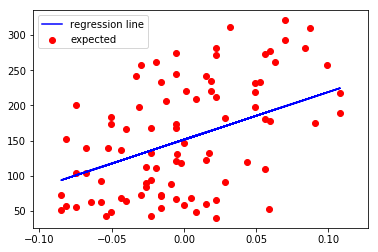

In [11]:
# plot results
plt.scatter(data_x_test, data_y_test, color='red', label='expected')
plt.plot(data_x_test, predictions, color='blue', label='regression line')
plt.legend()
plt.show()

## Multiple Linear Regression

In [12]:
# using bp and age in the diabetes regression problem
data_x, data_y = load_diabetes(return_X_y=True)
print('x shape:',data_x.shape , 'y shape:', data_y.shape)
dataframe=pd.DataFrame(load_diabetes().data)
dataframe.columns = load_diabetes().feature_names
dataframe.head()

x shape: (442, 10) y shape: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [13]:
# using the bp and age feature in this model. Needs to be a 2D array. 
# np.newaxis used to increase the dimension
data_x_features= data_x[:, [0,3]]
data_x_feature.shape

(442, 1)

In [14]:
# first 354 variables used for training (80% of the datasample)
data_x_train=data_x_features[:354]
#last 88 variables used for training (reminder of the dataset)
data_x_test=data_x_features[354:]

In [15]:
data_y_train=data_y[:354]
data_y_test=data_y[354:]

In [16]:
# Multiple Linear Regression Model
regr= LinearRegression()
regr.fit(data_x_train, data_y_train)
predictions= regr.predict(data_x_test)
print('regression coefficient:', regr.coef_)
print('regression intercept:', regr.intercept_)

regression coefficient: [  73.47524193  653.78475709]
regression intercept: 151.188581205


In [17]:
#Metrics
print('MSE: %.3f' % metrics.mean_squared_error(data_y_test, predictions))
print('R^2: %.3f' % metrics.r2_score(data_y_test, predictions))

MSE: 4844.878
R^2: 0.251


In [18]:
df = pd.DataFrame({'Actual': data_y_test, 'Predicted': predictions})
df=df.head(20)

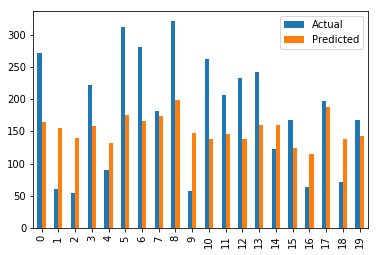

In [19]:
df.plot(kind='bar')
plt.show()

## Polynomial Regression